In [1]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("HTTP")
Pkg.add("StatsBase")
Pkg.add("VegaLite")
Pkg.add("Query")
Pkg.add("PyPlot")
Pkg.add("StatPlots")

  Resolving package versions...
 Installing known registries into `~/.julia`
######################################################################### 100.0%
      Added registry `General` to `~/.julia/registries/General`


LoadError: Unsatisfiable requirements detected for package CSV [336ed68f]:
 CSV [336ed68f] log:
 ├─CSV [336ed68f] has no known versions!
 └─restricted to versions 0.7.7 by an explicit requirement — no versions left

In [25]:
Pkg.add("Clustering")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
Updating `/hpctmp/ccekwk/proj/julia_intro/Project.toml`
  [aaaa29a8] + Clustering v0.14.2
No Changes to `/hpctmp/ccekwk/proj/julia_intro/Manifest.toml`


In [1]:

using CSV

In [2]:
#using CSV
using DataFrames
using Plots
using HTTP
using StatsBase

In [3]:
using VegaLite

In [4]:
using StatsPlots

### Display imported package versions

In [5]:
using Pkg
Pkg.status()

Status `/hpctmp/ccekwk/proj/julia_intro/Project.toml`
  [336ed68f] CSV v0.7.7
  [aaaa29a8] Clustering v0.14.2
  [a93c6f00] DataFrames v0.21.8
  [cd3eb016] HTTP v0.8.19
  [a03496cd] PlotlyBase v0.4.2
  [91a5bcdd] Plots v0.29.9
  [d330b81b] PyPlot v2.9.0
  [1a8c2f83] Query v1.0.0
  [2913bbd2] StatsBase v0.33.2
  [f3b207a7] StatsPlots v0.14.17
  [112f6efa] VegaLite v2.3.0


# Load Data

In [6]:
iris = CSV.File(
    HTTP.get(
        "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
        ).body; normalizenames=true
) |> DataFrame;


## Explore Data

In [7]:
unique(iris.variety)

3-element Array{String,1}:
 "Setosa"
 "Versicolor"
 "Virginica"

In [8]:
[(c[1], unique(c[2]), length(unique(c[2]))) for c in eachcol(iris, true)]

5-element Array{Tuple{Symbol,Array{T,1} where T,Int64},1}:
 (:sepal_length, [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.4, 4.8, 4.3, 5.8  …  6.7, 6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9], 35)
 (:sepal_width, [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4.0  …  4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2.0, 2.2, 2.5, 2.6], 23)
 (:petal_length, [1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1.0, 1.9, 4.7  …  6.3, 6.1, 5.3, 5.5, 6.7, 6.9, 5.7, 6.4, 5.4, 5.2], 43)
 (:petal_width, [0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6  …  1.8, 1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2.0, 2.4, 2.3], 22)
 (:variety, ["Setosa", "Versicolor", "Virginica"], 3)

In [9]:
countmap(iris[:variety])

Dict{String,Int64} with 3 entries:
  "Versicolor" => 50
  "Setosa"     => 50
  "Virginica"  => 50

In [10]:
first(iris, 5)

5×5 DataFrame
│ Row │ sepal_length │ sepal_width │ petal_length │ petal_width │ variety │
│     │ Float64      │ Float64     │ Float64      │ Float64     │ String  │
├─────┼──────────────┼─────────────┼──────────────┼─────────────┼─────────┤
│ 1   │ 5.1          │ 3.5         │ 1.4          │ 0.2         │ Setosa  │
│ 2   │ 4.9          │ 3.0         │ 1.4          │ 0.2         │ Setosa  │
│ 3   │ 4.7          │ 3.2         │ 1.3          │ 0.2         │ Setosa  │
│ 4   │ 4.6          │ 3.1         │ 1.5          │ 0.2         │ Setosa  │
│ 5   │ 5.0          │ 3.6         │ 1.4          │ 0.2         │ Setosa  │

In [11]:
head(iris, 10)

10×5 DataFrame
│ Row │ sepal_length │ sepal_width │ petal_length │ petal_width │ variety │
│     │ Float64      │ Float64     │ Float64      │ Float64     │ String  │
├─────┼──────────────┼─────────────┼──────────────┼─────────────┼─────────┤
│ 1   │ 5.1          │ 3.5         │ 1.4          │ 0.2         │ Setosa  │
│ 2   │ 4.9          │ 3.0         │ 1.4          │ 0.2         │ Setosa  │
│ 3   │ 4.7          │ 3.2         │ 1.3          │ 0.2         │ Setosa  │
│ 4   │ 4.6          │ 3.1         │ 1.5          │ 0.2         │ Setosa  │
│ 5   │ 5.0          │ 3.6         │ 1.4          │ 0.2         │ Setosa  │
│ 6   │ 5.4          │ 3.9         │ 1.7          │ 0.4         │ Setosa  │
│ 7   │ 4.6          │ 3.4         │ 1.4          │ 0.3         │ Setosa  │
│ 8   │ 5.0          │ 3.4         │ 1.5          │ 0.2         │ Setosa  │
│ 9   │ 4.4          │ 2.9         │ 1.4          │ 0.2         │ Setosa  │
│ 10  │ 4.9          │ 3.1         │ 1.5          │ 0.1         │ Setosa  │

In [12]:
last(iris, 5)

5×5 DataFrame
│ Row │ sepal_length │ sepal_width │ petal_length │ petal_width │ variety   │
│     │ Float64      │ Float64     │ Float64      │ Float64     │ String    │
├─────┼──────────────┼─────────────┼──────────────┼─────────────┼───────────┤
│ 1   │ 6.7          │ 3.0         │ 5.2          │ 2.3         │ Virginica │
│ 2   │ 6.3          │ 2.5         │ 5.0          │ 1.9         │ Virginica │
│ 3   │ 6.5          │ 3.0         │ 5.2          │ 2.0         │ Virginica │
│ 4   │ 6.2          │ 3.4         │ 5.4          │ 2.3         │ Virginica │
│ 5   │ 5.9          │ 3.0         │ 5.1          │ 1.8         │ Virginica │

#### Simple Data Descripion

In [13]:
describe(iris)

5×8 DataFrame. Omitted printing of 2 columns
│ Row │ variable     │ mean    │ min    │ median │ max       │ nunique │
│     │ Symbol       │ Union…  │ Any    │ Union… │ Any       │ Union…  │
├─────┼──────────────┼─────────┼────────┼────────┼───────────┼─────────┤
│ 1   │ sepal_length │ 5.84333 │ 4.3    │ 5.8    │ 7.9       │         │
│ 2   │ sepal_width  │ 3.05733 │ 2.0    │ 3.0    │ 4.4       │         │
│ 3   │ petal_length │ 3.758   │ 1.0    │ 4.35   │ 6.9       │         │
│ 4   │ petal_width  │ 1.19933 │ 0.1    │ 1.3    │ 2.5       │         │
│ 5   │ variety      │         │ Setosa │        │ Virginica │ 3       │

In [14]:
describe(iris[:sepal_width])

Summary Stats:
Length:         150
Missing Count:  0
Mean:           3.057333
Minimum:        2.000000
1st Quartile:   2.800000
Median:         3.000000
3rd Quartile:   3.300000
Maximum:        4.400000
Type:           Float64


#### Column Names

In [15]:
names(iris)

5-element Array{String,1}:
 "sepal_length"
 "sepal_width"
 "petal_length"
 "petal_width"
 "variety"

## Querying Dataframes

In [16]:
using Query

In [17]:
iris |> 
    @filter(_.sepal_width < 3) |>         # Conditional # Filter. Anonymous function that accepts 1 parameter, returns boolean
    @map({_.variety, _.sepal_length}) |>  # Columns to view/Elements selector.
    DataFrame # DataFrame data sink

57×2 DataFrame
│ Row │ variety    │ sepal_length │
│     │ String     │ Float64      │
├─────┼────────────┼──────────────┤
│ 1   │ Setosa     │ 4.4          │
│ 2   │ Setosa     │ 4.5          │
│ 3   │ Versicolor │ 5.5          │
│ 4   │ Versicolor │ 6.5          │
│ 5   │ Versicolor │ 5.7          │
│ 6   │ Versicolor │ 4.9          │
│ 7   │ Versicolor │ 6.6          │
│ 8   │ Versicolor │ 5.2          │
│ 9   │ Versicolor │ 5.0          │
│ 10  │ Versicolor │ 6.0          │
⋮
│ 47  │ Virginica  │ 5.6          │
│ 48  │ Virginica  │ 7.7          │
│ 49  │ Virginica  │ 6.3          │
│ 50  │ Virginica  │ 6.2          │
│ 51  │ Virginica  │ 6.4          │
│ 52  │ Virginica  │ 7.4          │
│ 53  │ Virginica  │ 6.4          │
│ 54  │ Virginica  │ 6.3          │
│ 55  │ Virginica  │ 6.1          │
│ 56  │ Virginica  │ 5.8          │
│ 57  │ Virginica  │ 6.3          │

#### Groupby

In [18]:
iris|> 
    @groupby(_.variety) |> 
    @map({Key=key(_), sepal_length_avg=mean(_.sepal_length)}) |>  # Columns to view/Elements selector.
    DataFrame # DataFrame data sink

3×2 DataFrame
│ Row │ Key        │ sepal_length_avg │
│     │ String     │ Float64          │
├─────┼────────────┼──────────────────┤
│ 1   │ Setosa     │ 5.006            │
│ 2   │ Versicolor │ 5.936            │
│ 3   │ Virginica  │ 6.588            │

#### Filter + Groupby

In [19]:
iris |> 
    @filter(_.sepal_width < 3) |>           # Conditional # Filter. Anonymous function that accepts 1 parameter, returns boolean
    @groupby(_.variety) |> 
    @map({Key=key(_), Count=length(_)}) |>  # Columns to view/Elements selector.
    DataFrame                               #  DataFrame data sink

3×2 DataFrame
│ Row │ Key        │ Count │
│     │ String     │ Int64 │
├─────┼────────────┼───────┤
│ 1   │ Setosa     │ 2     │
│ 2   │ Versicolor │ 34    │
│ 3   │ Virginica  │ 21    │

#### Get unique values

In [20]:
iris |> 
    @map(_.variety) |> 
    @unique() |>
    collect # Array data sink

3-element Array{String,1}:
 "Setosa"
 "Versicolor"
 "Virginica"

## Clustering

In [21]:
using Clustering

In [22]:
df_feats = iris[:, [x for x in names(iris) if x != "variety"]]

150×4 DataFrame
│ Row │ sepal_length │ sepal_width │ petal_length │ petal_width │
│     │ Float64      │ Float64     │ Float64      │ Float64     │
├─────┼──────────────┼─────────────┼──────────────┼─────────────┤
│ 1   │ 5.1          │ 3.5         │ 1.4          │ 0.2         │
│ 2   │ 4.9          │ 3.0         │ 1.4          │ 0.2         │
│ 3   │ 4.7          │ 3.2         │ 1.3          │ 0.2         │
│ 4   │ 4.6          │ 3.1         │ 1.5          │ 0.2         │
│ 5   │ 5.0          │ 3.6         │ 1.4          │ 0.2         │
│ 6   │ 5.4          │ 3.9         │ 1.7          │ 0.4         │
│ 7   │ 4.6          │ 3.4         │ 1.4          │ 0.3         │
│ 8   │ 5.0          │ 3.4         │ 1.5          │ 0.2         │
│ 9   │ 4.4          │ 2.9         │ 1.4          │ 0.2         │
│ 10  │ 4.9          │ 3.1         │ 1.5          │ 0.1         │
⋮
│ 140 │ 6.9          │ 3.1         │ 5.4          │ 2.1         │
│ 141 │ 6.7          │ 3.1         │ 5.6          │ 2.4         │
│ 142 │ 6.9          │ 3.1         │ 5.1          │ 2.3         │
│ 143 │ 5.8          │ 2.7         │ 5.1          │ 1.9         │
│ 144 │ 6.8          │ 3.2         │ 5.9          │ 2.3         │
│ 145 │ 6.7          │ 3.3         │ 5.7          │ 2.5         │
│ 146 │ 6.7          │ 3.0         │ 5.2          │ 2.3         │
│ 147 │ 6.3          │ 2.5         │ 5.0          │ 1.9         │
│ 148 │ 6.5          │ 3.0         │ 5.2          │ 2.0         │
│ 149 │ 6.2          │ 3.4         │ 5.4          │ 2.3         │
│ 150 │ 5.9          │ 3.0         │ 5.1          │ 1.8         │

In [23]:
lbl = iris[:, 5]

150-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "Setosa"
 "Setosa"
 "Setosa"
 "Setosa"
 "Setosa"
 "Setosa"
 "Setosa"
 "Setosa"
 "Setosa"
 "Setosa"
 "Setosa"
 "Setosa"
 "Setosa"
 ⋮
 "Virginica"
 "Virginica"
 "Virginica"
 "Virginica"
 "Virginica"
 "Virginica"
 "Virginica"
 "Virginica"
 "Virginica"
 "Virginica"
 "Virginica"
 "Virginica"

In [24]:
features = collect(Matrix(df_feats[:, 1:4])');

In [25]:
features

4×150 Array{Float64,2}:
 5.1  4.9  4.7  4.6  5.0  5.4  4.6  5.0  …  6.8  6.7  6.7  6.3  6.5  6.2  5.9
 3.5  3.0  3.2  3.1  3.6  3.9  3.4  3.4     3.2  3.3  3.0  2.5  3.0  3.4  3.0
 1.4  1.4  1.3  1.5  1.4  1.7  1.4  1.5     5.9  5.7  5.2  5.0  5.2  5.4  5.1
 0.2  0.2  0.2  0.2  0.2  0.4  0.3  0.2     2.3  2.5  2.3  1.9  2.0  2.3  1.8

In [26]:
R = kmeans(features, 3; maxiter=300, display=:iter)

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.017200e+02
      1       7.904357e+01      -2.267643e+01 |        2
      2       7.885567e+01      -1.879075e-01 |        0
      3       7.885567e+01       0.000000e+00 |        0
K-means converged with 3 iterations (objv = 78.8556658259767)


KmeansResult{Array{Float64,2},Float64,Int64}([5.88360655737705 5.005999999999999 6.853846153846153; 2.740983606557377 3.428000000000001 3.0769230769230766; 4.388524590163935 1.4620000000000002 5.715384615384615; 1.4344262295081966 0.2459999999999999 2.053846153846153], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  3, 3, 1, 3, 3, 3, 1, 3, 3, 1], [0.019980000000018094, 0.20038000000000977, 0.17398000000001446, 0.2759800000000041, 0.03557999999999595, 0.45838000000000534, 0.17238000000000397, 0.004380000000011819, 0.6519799999999947, 0.1415800000000189  …  0.1573372781064677, 0.4419526627218886, 0.7316259070142337, 0.11272189349114115, 0.2727218934911093, 0.3557988165680399, 0.8221177102929005, 0.3996449704141867, 0.6919526627218886, 0.7071996775060256], [61, 50, 39], [61, 50, 39], 78.8556658259767, 3, true)

In [27]:
@assert nclusters(R) == 3

In [28]:
a = assignments(R) # get the assignments of points to clusters
c = counts(R) # get the cluster sizes
M = R.centers # get the cluster centers

4×3 Array{Float64,2}:
 5.88361  5.006  6.85385
 2.74098  3.428  3.07692
 4.38852  1.462  5.71538
 1.43443  0.246  2.05385

In [29]:
cluster_class = DataFrame(class=lbl, cluster=a);

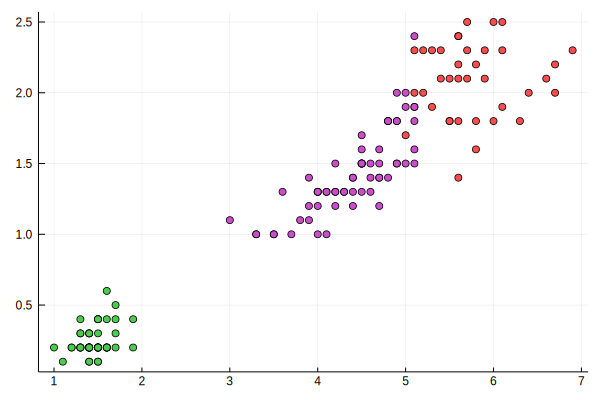

In [30]:
scatter(iris.petal_length, iris.petal_width, marker_z=R.assignments,
        color=:lightrainbow, legend=false)

In [31]:
cluster_class[25:75,:]

51×2 DataFrame
│ Row │ class      │ cluster │
│     │ String     │ Int64   │
├─────┼────────────┼─────────┤
│ 1   │ Setosa     │ 2       │
│ 2   │ Setosa     │ 2       │
│ 3   │ Setosa     │ 2       │
│ 4   │ Setosa     │ 2       │
│ 5   │ Setosa     │ 2       │
│ 6   │ Setosa     │ 2       │
│ 7   │ Setosa     │ 2       │
│ 8   │ Setosa     │ 2       │
│ 9   │ Setosa     │ 2       │
│ 10  │ Setosa     │ 2       │
⋮
│ 41  │ Versicolor │ 1       │
│ 42  │ Versicolor │ 1       │
│ 43  │ Versicolor │ 1       │
│ 44  │ Versicolor │ 1       │
│ 45  │ Versicolor │ 1       │
│ 46  │ Versicolor │ 1       │
│ 47  │ Versicolor │ 1       │
│ 48  │ Versicolor │ 1       │
│ 49  │ Versicolor │ 1       │
│ 50  │ Versicolor │ 1       │
│ 51  │ Versicolor │ 1       │

#### info on histogram function

In [14]:
?Plots.histogram

```
histogram(x)
histogram!(x)
```

Plot a histogram.

# Arguments

  * `x`: AbstractVector of values to be binned
  * `bins`: Integer, NTuple{2,Integer}, AbstractVector or          Symbol. Default is :auto (the Freedman-Diaconis rule). For          histogram-types, defines the approximate number of bins to aim for,          or the auto-binning algorithm to use (:sturges,          :sqrt, :rice, :scott or :fd). For fine-grained control          pass a Vector of break values, e.g. `range(minimum(x),          stop = maximum(x), length = 25)`
  * `weights`: Vector of weights for the values in `x`, for weighted bin counts
  * `normalize`: Bool or Symbol. Histogram normalization mode.               Possible values are: false/:none (no normalization,               default), true/:pdf (normalize to a discrete               Probability Density Function, where the total area of the               bins is 1), :probability (bin heights sum to 1)               and :density (the area of each bin, rather than               the height, is equal to the counts - useful for               uneven bin sizes).
  * `bar_position`: Symbol.  Choose from `:overlay` (default),                  `:stack`.  (warning: May not be implemented fully)
  * `bar_width`: nothing or Number. Width of bars in data               coordinates. When nothing, chooses based on x (or y when               `orientation = :h`).
  * `bar_edges`: Bool.  Align bars to edges (true), or centers               (the default)?
  * `orientation`: Symbol.  Horizontal or vertical orientation                 for bar types.  Values `:h`, `:hor`,                 `:horizontal` correspond to horizontal (sideways,                 anchored to y-axis), and `:v`, `:vert`, and                 `:vertical` correspond to vertical (the default).

# Example

```julia-repl
julia> histogram([1,2,1,1,4,3,8],bins=0:8)
```


## Plotting

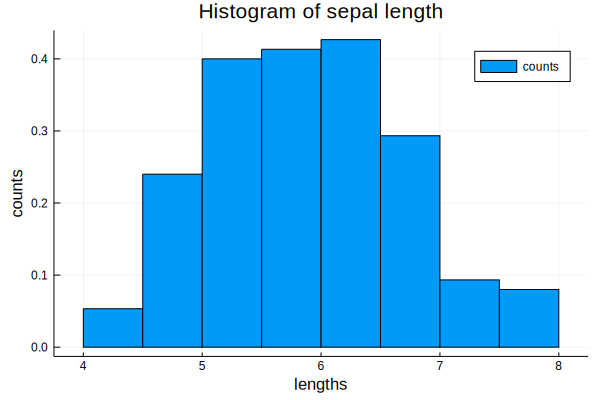

In [10]:
Plots.histogram(iris.sepal_length, 
    normalize=true,
    bin=9,
    title = "Histogram of sepal length",
    label="counts",
    xlabel="lengths",
    ylabel="counts")

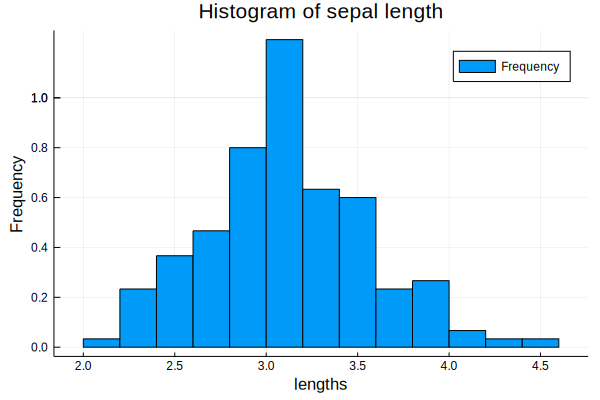

In [11]:
Plots.histogram(iris[:sepal_width], 
    normalize=true,
    title = "Histogram of sepal length",
    label="Frequency",
    xlabel="lengths",
    ylabel="Frequency")

#### Switching to Plotly Backend

In [12]:
plotly()

┌ Info: Precompiling ORCA [47be7bcc-f1a6-5447-8b36-7eeeff7534fd]
└ @ Base loading.jl:1278
┌ Warning: ORCA.jl has been deprecated and all savefig functionality
│ has been implemented directly in PlotlyBase itself.
│ 
│ By implementing in PlotlyBase.jl, the savefig routines are automatically
│ available to PlotlyJS.jl also.
└ @ ORCA /home/svu/ccekwk/.julia/packages/ORCA/U5XaN/src/ORCA.jl:8


Plots.PlotlyBackend()

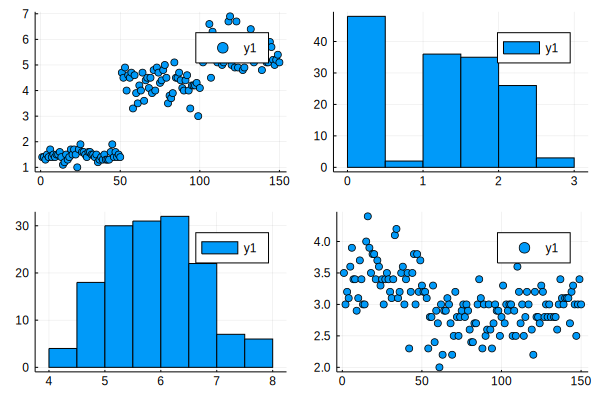

In [23]:
p1 = Plots.scatter(iris.petal_length)
p2 = Plots.histogram(iris.petal_width)
p3 = Plots.histogram(iris.sepal_length)
p4 = Plots.scatter(iris.sepal_width);

Plots.plot(p1,p2,p3,p4, layouts=(2,2), legends = false)

┌ Warning: Keyword argument hover not supported with Plots.GRBackend().  Choose from: Set([:top_margin, :group, :background_color, :yforeground_color_text, :yguidefontcolor, :seriesalpha, :legendfontcolor, :seriescolor, :ztick_direction, :zlims, :overwrite_figure, :xguidefonthalign, :normalize, :linestyle, :xflip, :fillcolor, :ygrid, :background_color_inside, :zguidefonthalign, :bins, :yscale, :xtickfontcolor, :xguide, :fillalpha, :tick_direction, :yguidefontsize, :legendfontfamily, :foreground_color, :xtickfonthalign, :x, :ytickfontrotation, :legend, :discrete_values, :ytick_direction, :xguidefontrotation, :ribbon, :tickfontrotation, :xdiscrete_values, :legendtitle, :xgridstyle, :orientation, :gridstyle, :markersize, :camera, :xforeground_color_grid, :quiver, :zticks, :markerstrokecolor, :ztickfontrotation, :ztickfonthalign, :legendfonthalign, :xtickfontsize, :levels, :zgridstyle, :foreground_color_border, :zguidefontvalign, :marker_z, :markerstrokealpha, :markeralpha, :tickfontvalign

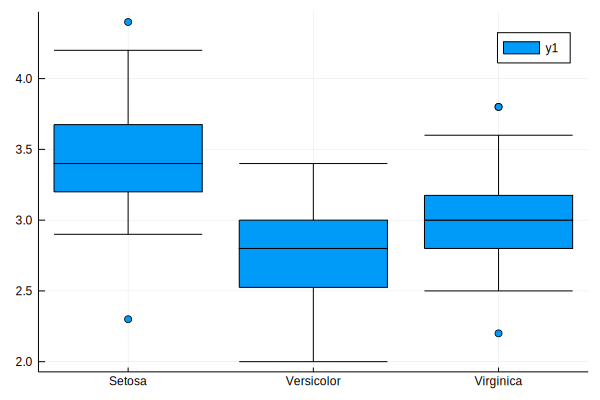

In [24]:
Plots.boxplot(iris[:variety], iris[:sepal_width])

### Using VegaLite

Fontconfig warning: ignoring UTF-8: not a valid region tag
Fontconfig warning: ignoring UTF-8: not a valid region tag


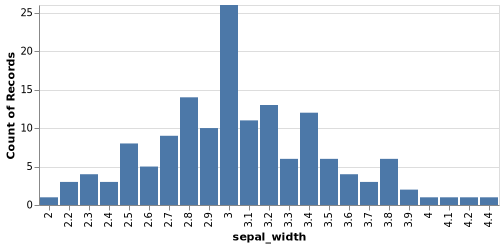

In [17]:
iris |> @vlplot(:bar, x="sepal_width:n", y="count()")

### LINQ-style Queries

More info [here](http://www.queryverse.org/Query.jl/stable/linqquerycommands/)

In [27]:

x = @from i in iris begin
    @where i.sepal_width>2
    @select {i.variety, i.sepal_length}
    @collect DataFrame
end

149×2 DataFrame
│ Row │ variety   │ sepal_length │
│     │ String    │ Float64      │
├─────┼───────────┼──────────────┤
│ 1   │ Setosa    │ 5.1          │
│ 2   │ Setosa    │ 4.9          │
│ 3   │ Setosa    │ 4.7          │
│ 4   │ Setosa    │ 4.6          │
│ 5   │ Setosa    │ 5.0          │
│ 6   │ Setosa    │ 5.4          │
│ 7   │ Setosa    │ 4.6          │
│ 8   │ Setosa    │ 5.0          │
│ 9   │ Setosa    │ 4.4          │
│ 10  │ Setosa    │ 4.9          │
⋮
│ 139 │ Virginica │ 6.9          │
│ 140 │ Virginica │ 6.7          │
│ 141 │ Virginica │ 6.9          │
│ 142 │ Virginica │ 5.8          │
│ 143 │ Virginica │ 6.8          │
│ 144 │ Virginica │ 6.7          │
│ 145 │ Virginica │ 6.7          │
│ 146 │ Virginica │ 6.3          │
│ 147 │ Virginica │ 6.5          │
│ 148 │ Virginica │ 6.2          │
│ 149 │ Virginica │ 5.9          │